In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.dropna(subset=['title'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
def splitNested(element):
    element = element.str.split(", ")
    element = element.apply(pd.Series)
    element['title'] = df['title']
    element = pd.melt(element, id_vars=['title'], var_name='Position', value_name='Value')
    element = element.dropna(subset=['Value'])
    return element

In [6]:
director_df = splitNested(df['director'])
country_df = splitNested(df['country'])
listedin_df = splitNested(df['listed_in'])

In [7]:

df = pd.merge(director_df, df, on='title', how='right')
df = pd.merge(country_df, df, on='title', how='right')
df = pd.merge(listedin_df, df, on='title', how='right')

In [8]:
df.drop(['variable', 'variable_x', 'variable_y', 'listed_in'], axis=1, inplace=True, errors='ignore')

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [10]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25890 entries, 0 to 25889
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         25890 non-null  object        
 1   Position      25890 non-null  object        
 2   Value         25890 non-null  object        
 3   Position_x    24066 non-null  object        
 4   Value_x       24066 non-null  object        
 5   Position_y    19323 non-null  object        
 6   Value_y       19323 non-null  object        
 7   show_id       25890 non-null  object        
 8   type          25890 non-null  object        
 9   director      19323 non-null  object        
 10  cast          23744 non-null  object        
 11  country       24066 non-null  object        
 12  date_added    25659 non-null  datetime64[ns]
 13  release_year  25890 non-null  int64         
 14  rating        25884 non-null  object        
 15  duration      25887 non-null  object

Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [12]:
movies_df = df[df['type'] == 'Movie']
top_movie_countries=(movies_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10))
print(top_movie_countries)

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64


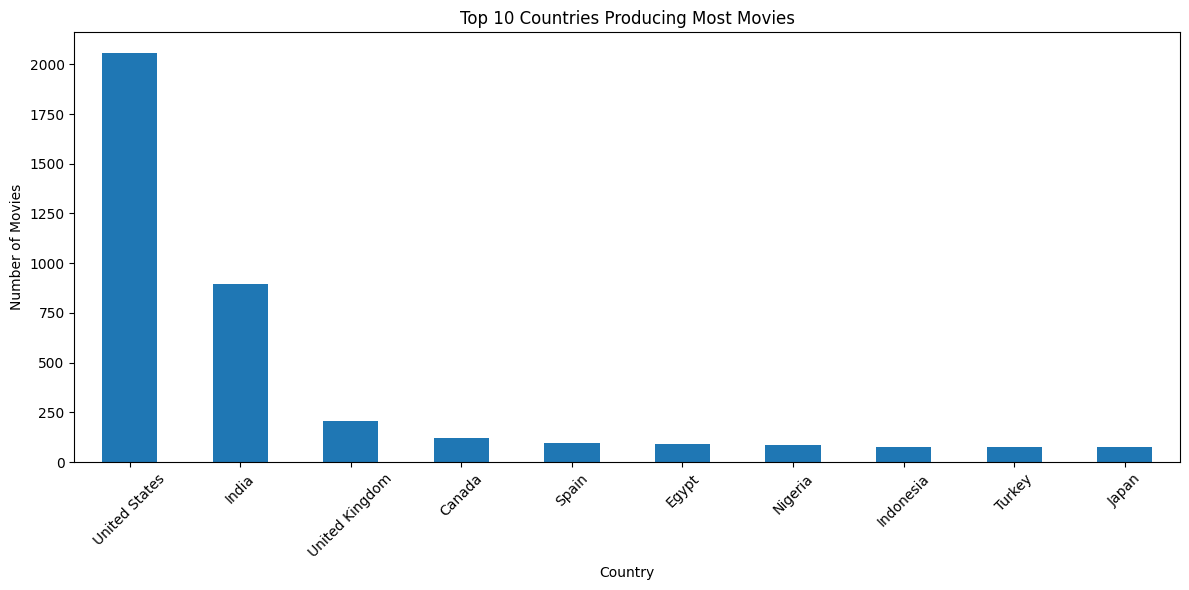

In [13]:
plt.figure(figsize=(12,6))
top_movie_countries.plot(kind='bar')
plt.title("Top 10 Countries Producing Most Movies")
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [14]:
tv_df = df[df['type'] == 'TV Show']
top_tv_countries = (tv_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10))
print("Top 10 countries by number of TV Shows:\n", top_tv_countries)

Top 10 countries by number of TV Shows:
 country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          48
Name: title, dtype: int64


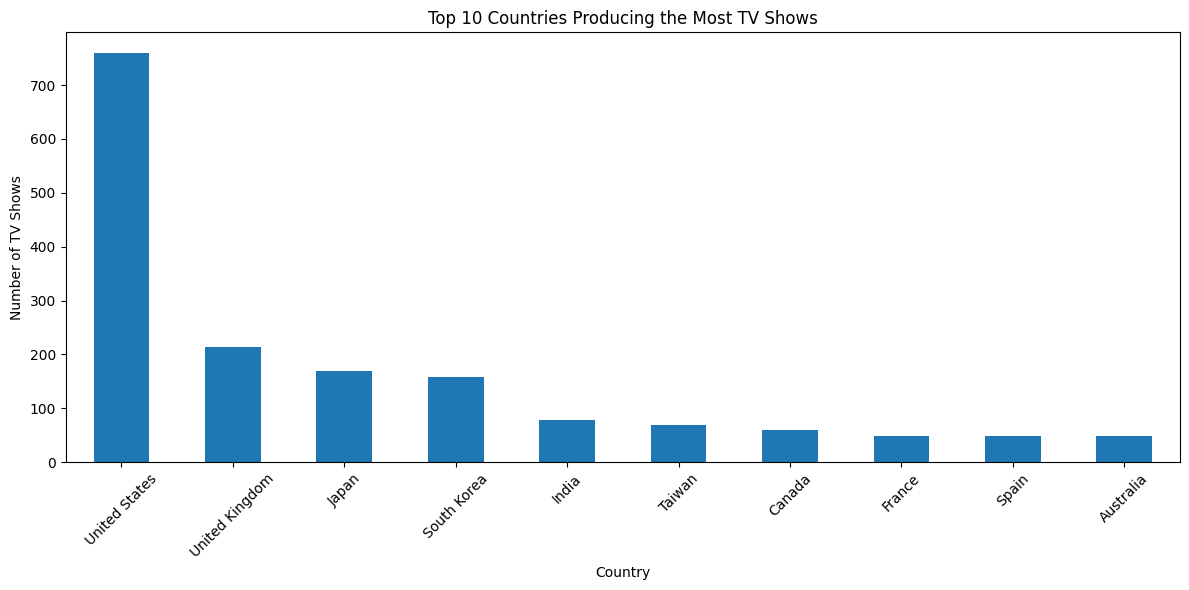

In [15]:
plt.figure(figsize=(12,6))
top_tv_countries.plot(kind='bar')

plt.title("Top 10 Countries Producing the Most TV Shows")
plt.xlabel("Country")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [16]:
movies_month = (movies_df.dropna(subset=['month_added']).groupby('month_added')['title']
             .nunique()
             .sort_values(ascending=False))
print("Top months for Movies (month -> count):\n", movies_month.head(12))

Top months for Movies (month -> count):
 month_added
July         565
April        550
December     547
January      546
October      545
March        529
September    519
August       519
November     498
June         492
May          439
February     382
Name: title, dtype: int64


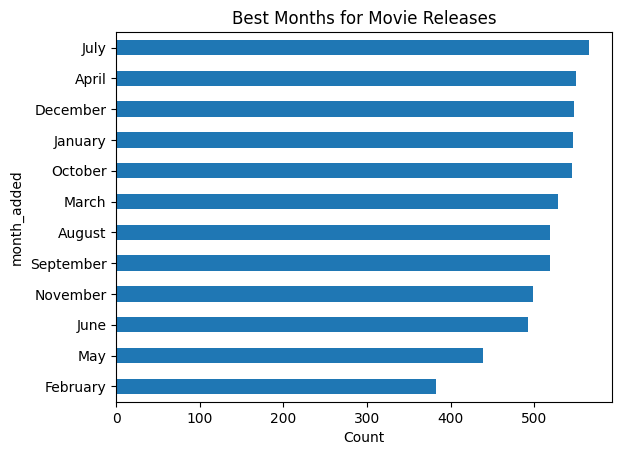

In [17]:
movies_month.sort_values().plot(kind='barh')
plt.title("Best Months for Movie Releases")
plt.xlabel("Count")
plt.show()

In [18]:
# TV Shows
tv_week = (tv_df.dropna(subset=['week_added']).groupby('week_added')['title'].nunique().sort_values(ascending=False))
print("Top weeks for TV Shows (week number -> count):\n", tv_week.head(10))

Top weeks for TV Shows (week number -> count):
 week_added
27    85
31    79
24    75
35    73
13    73
40    69
26    69
5     68
44    67
37    67
Name: title, dtype: int64


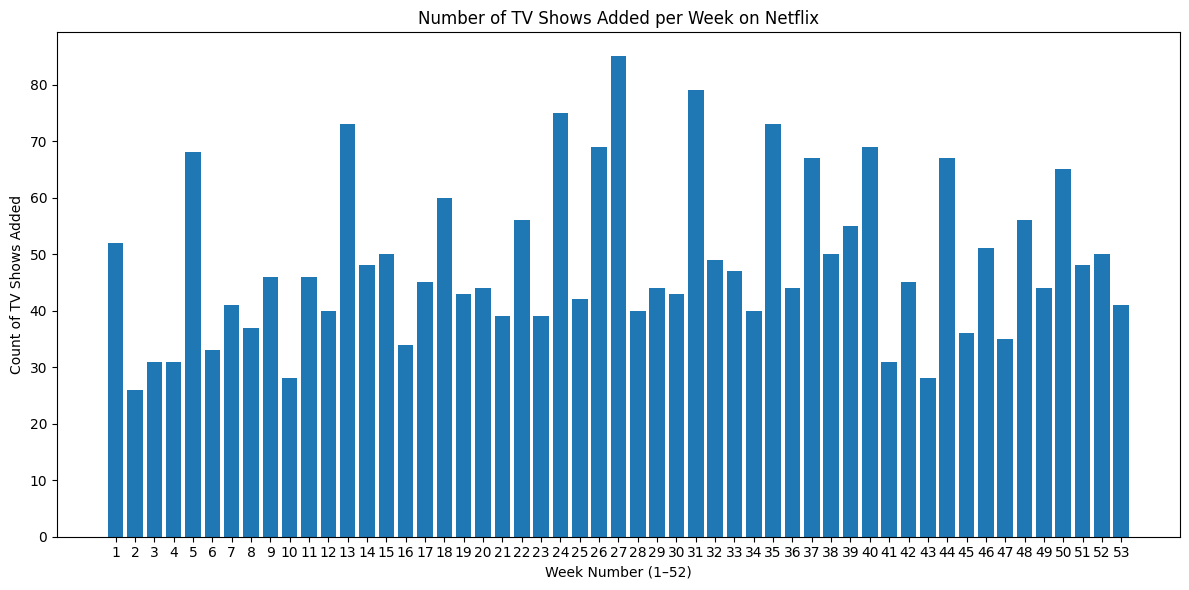

In [19]:
plt.figure(figsize=(12,6))
plt.bar(tv_week.index.astype(int), tv_week.values)

plt.title("Number of TV Shows Added per Week on Netflix")
plt.xlabel("Week Number (1–52)")
plt.ylabel("Count of TV Shows Added")

plt.xticks(tv_week.index.astype(int))  # show only existing week numbers
plt.tight_layout()
plt.show()

Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [20]:
# Movies by month
movies_month = (movies_df.dropna(subset=['month_added']).groupby('month_added')['title'].nunique().sort_values(ascending=False))
print("Top months for Movies (month -> count):\n", movies_month.head(12))
# TV Shows by month
tv_month = (tv_df.dropna(subset=['month_added']).groupby('month_added')['title'].nunique().sort_values(ascending=False))
print("Top months for TV Shows (month -> count):\n", tv_month.head(12))

Top months for Movies (month -> count):
 month_added
July         565
April        550
December     547
January      546
October      545
March        529
September    519
August       519
November     498
June         492
May          439
February     382
Name: title, dtype: int64
Top months for TV Shows (month -> count):
 month_added
July         254
December     250
September    246
June         232
August       230
October      210
April        209
March        205
November     199
May          187
January      181
February     175
Name: title, dtype: int64


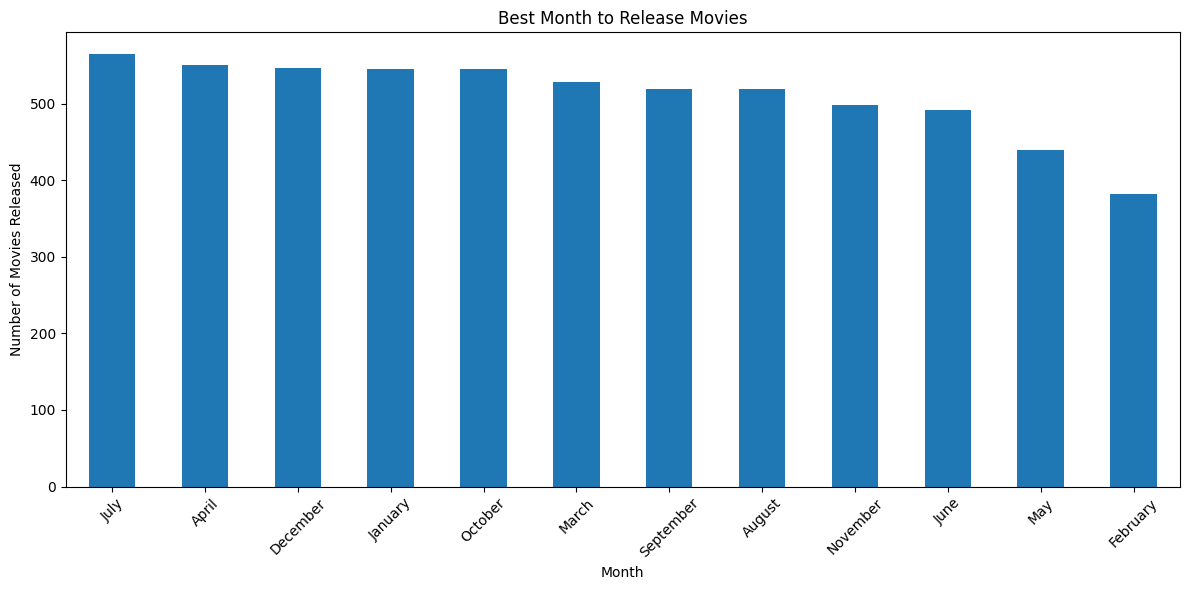

In [21]:
plt.figure(figsize=(12,6))
movies_month.plot(kind='bar')

plt.title("Best Month to Release Movies")
plt.xlabel("Month")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Identify the top 10 actors who have appeared in most movies or TV shows.

In [22]:
movies_df[movies_df['cast']!='missing'].groupby('cast').count()['show_id'].sort_values(ascending=False).head(10)

cast
Liam Neeson, Salma Hayek, John Krasinski, Frank Langella, Alfred Molina, John Rhys-Davies, Quvenzhané Wallis                                                                                                            100
Andy McAvin, James Faulkner, Luci Christian, John Swasey                                                                                                                                                                 72
Madeleine Coghlan, Savannah Kennick, Ruth Bradley, Ava Acres, Sophie Traub, Jocelin Donahue, Harley Morenstein, Harley Quinn Smith, Ashley Greene, Olivia Roush, Seth Green, Clare Grant, Lorenza Izzo, Andrew Bowen     36
Tom Hanks, Halle Berry, Jim Broadbent, Hugo Weaving, Jim Sturgess, Doona Bae, Ben Whishaw, Keith David, James D'Arcy, Zhou Xun                                                                                           36
Anshuman Jha, Rajat Kapoor, Pooja Ruparel, Piaa Bajpai, Huma Qureshi, Usha Uthup, Radhika Apte, Swara Bhaskar      

In [23]:
top_cast = (
    movies_df[movies_df['cast'] != 'missing']
        .groupby('cast')['show_id']
        .count()
        .sort_values(ascending=False)
        .head(10)
)


Identify the top 10 directors who have appeared in most movies or TV shows

In [24]:
top_directors = (df[df['director'].notna()].groupby('director')['title'].nunique().sort_values(ascending=False).head(10))
print("Top 10 directors:\n", top_directors)

Top 10 directors:
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: title, dtype: int64


In [25]:
top_directors = (
    df[df['director'].notna()]
      .groupby('director')['title']
      .nunique()
      .sort_values(ascending=False)
      .head(10)
)
print("Top 10 directors:\n", top_directors)


Top 10 directors:
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: title, dtype: int64


Which genre movies are more popular or produced more.

In [26]:
genre_counts = (df.groupby('Value')['title'].nunique().sort_values(ascending=False))
print("Top genres (genre -> number of titles):\n", genre_counts.head(20))

Top genres (genre -> number of titles):
 Value
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: title, dtype: int64


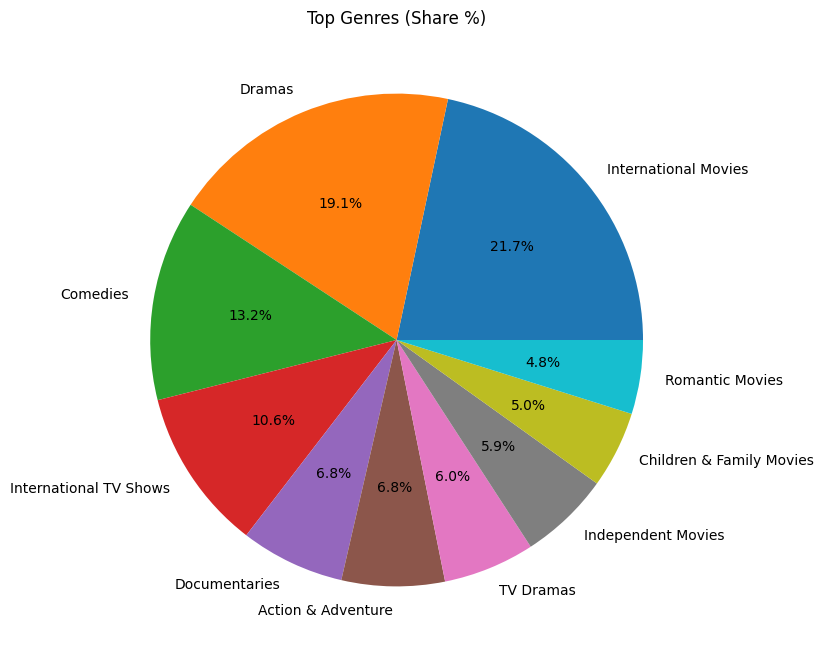

In [27]:
plt.figure(figsize=(8,8))
genre_counts.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top Genres (Share %)")
plt.ylabel("")
plt.show()


Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)

In [28]:
print("Columns available for release info:", [c for c in df.columns if 'release' in c.lower()])
if 'release_date' in df.columns:
    df['release_date_full'] = pd.to_datetime(df['release_date'], errors='coerce')
elif 'release_year' in df.columns:
    df['release_date_full'] = pd.to_datetime(df['release_year'].astype(str) + '-01-01', errors='coerce')
else:
    
    df['release_date_full'] = pd.NaT
# compute delta days for Movies only (where both dates exist)
movies_delta = df[(df['type']=='Movie') & df['release_date_full'].notna() & df['date_added'].notna()].copy()
movies_delta['days_to_netflix'] = (movies_delta['date_added'] - movies_delta['release_date_full']).dt.days
# consider "recent past" — last 5 years of additions
max_date = df['date_added'].max()
cutoff = max_date - pd.DateOffset(years=5)
recent_movies = movies_delta[movies_delta['date_added'] >= cutoff]
# Summary stats
print("Count of movies with computable delta (recent 5 years):", recent_movies.shape[0])
print("Median days to Netflix (recent):", recent_movies['days_to_netflix'].median())
print("Mean days to Netflix (recent):", recent_movies['days_to_netflix'].mean())
print("25th,75th percentiles:", recent_movies['days_to_netflix'].quantile([0.25,0.75]).to_dict())

Columns available for release info: ['release_year']
Count of movies with computable delta (recent 5 years): 18061
Median days to Netflix (recent): 949.0
Mean days to Netflix (recent): 2447.506671834339
25th,75th percentiles: {0.25: 359.0, 0.75: 3042.0}


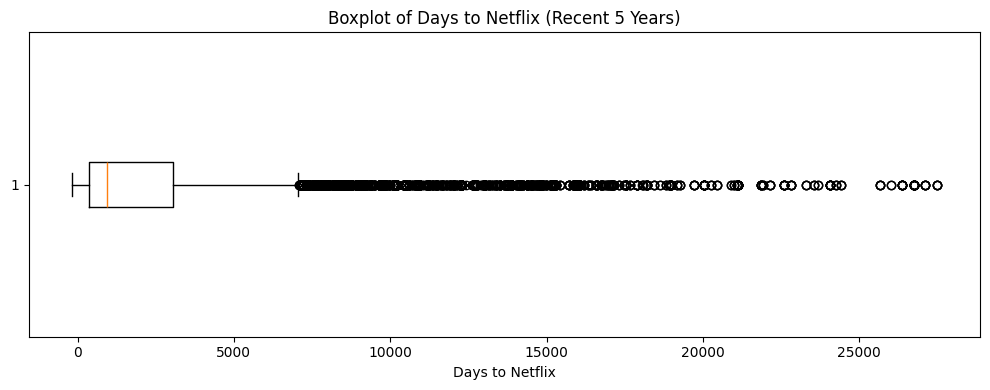

In [29]:
plt.figure(figsize=(10,4))
plt.boxplot(recent_movies['days_to_netflix'].dropna(), vert=False)

plt.title("Boxplot of Days to Netflix (Recent 5 Years)")
plt.xlabel("Days to Netflix")
plt.tight_layout()
plt.show()
